In [1]:
%matplotlib inline
!pip install fastf1
!pip install timple


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import fastf1
import pandas as pd

# Get the telemetry data for the testing session
fastf1.Cache.enable_cache('/content/sample_data')  # replace with your cache directory
event = fastf1.get_event(2022, 'Bahrain')


In [15]:
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps


In [5]:
session = fastf1.get_session(2022,1,'FP1')

In [6]:
session.load()

In [70]:
drivers = pd.unique(session.laps['Driver'])
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
print(fastest_laps.columns)

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')


In [71]:
df = fastest_laps[['Driver', 'Team', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
df = df.rename(columns={'LapTime': 'LapTimeFP1', 'Sector1Time': 'Sector1TimeFP1', 'Sector2Time': 'Sector2TimeFP1', 'Sector3Time': 'Sector3TimeFP1'})
df = df.sort_values(by=['Team'], ascending=True)

print (df)

   Driver             Team             LapTimeFP1         Sector1TimeFP1  \
10    ZHO       Alfa Romeo 0 days 00:01:35.053000 0 days 00:00:30.140000   
0     GAS       AlphaTauri 0 days 00:01:34.193000 0 days 00:00:30.076000   
8     TSU       AlphaTauri 0 days 00:01:35.028000 0 days 00:00:30.231000   
11    OCO           Alpine 0 days 00:01:35.151000 0 days 00:00:30.167000   
7     ALO           Alpine        0 days 00:01:35 0 days 00:00:30.297000   
13    HUL     Aston Martin 0 days 00:01:35.815000 0 days 00:00:30.699000   
5     STR     Aston Martin 0 days 00:01:34.814000 0 days 00:00:30.324000   
1     LEC          Ferrari 0 days 00:01:34.557000 0 days 00:00:30.258000   
2     SAI          Ferrari 0 days 00:01:34.611000 0 days 00:00:30.206000   
18    MAG     Haas F1 Team 0 days 00:01:36.804000 0 days 00:00:30.945000   
17    MSC     Haas F1 Team 0 days 00:01:36.536000 0 days 00:00:30.852000   
15    NOR          McLaren 0 days 00:01:36.304000 0 days 00:00:30.711000   
16    RIC   

In [22]:
session_fp2 = fastf1.get_session(2022,1,'FP2')
session_fp2.load()

In [72]:
drivers = pd.unique(session_fp2.laps['Driver'])
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session_fp2.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

df_fp2 = fastest_laps[['Driver', 'Team', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
df_fp2 = df_fp2.rename(columns={'LapTime': 'LapTimeFP2', 'Sector1Time': 'Sector1TimeFP2', 'Sector2Time': 'Sector2TimeFP2', 'Sector3Time': 'Sector3TimeFP2'})
df_fp2 = df_fp2.sort_values(by=['Team'], ascending=True)
print(df_fp2)

   Driver             Team             LapTimeFP2         Sector1TimeFP2  \
5     BOT       Alfa Romeo 0 days 00:01:32.951000 0 days 00:00:29.662000   
14    ZHO       Alfa Romeo 0 days 00:01:33.953000 0 days 00:00:30.014000   
12    GAS       AlphaTauri 0 days 00:01:33.621000 0 days 00:00:29.655000   
13    TSU       AlphaTauri 0 days 00:01:33.789000 0 days 00:00:29.988000   
4     ALO           Alpine 0 days 00:01:32.877000 0 days 00:00:29.800000   
11    OCO           Alpine 0 days 00:01:33.360000 0 days 00:00:29.877000   
16    HUL     Aston Martin 0 days 00:01:34.061000 0 days 00:00:30.220000   
15    STR     Aston Martin 0 days 00:01:33.958000 0 days 00:00:30.088000   
1     LEC          Ferrari 0 days 00:01:32.023000 0 days 00:00:29.454000   
2     SAI          Ferrari 0 days 00:01:32.520000 0 days 00:00:29.621000   
9     MAG     Haas F1 Team 0 days 00:01:33.183000 0 days 00:00:29.866000   
7     MSC     Haas F1 Team 0 days 00:01:33.085000 0 days 00:00:29.881000   
17    RIC   

In [73]:
if len(df) > len(df_fp2):
    merge_direction = 'left'
else:
    merge_direction = 'right'

results = pd.merge(df, df_fp2, on=['Driver', 'Team'], how=merge_direction)
print(results)



   Driver             Team             LapTimeFP1         Sector1TimeFP1  \
0     BOT       Alfa Romeo                    NaT                    NaT   
1     ZHO       Alfa Romeo 0 days 00:01:35.053000 0 days 00:00:30.140000   
2     GAS       AlphaTauri 0 days 00:01:34.193000 0 days 00:00:30.076000   
3     TSU       AlphaTauri 0 days 00:01:35.028000 0 days 00:00:30.231000   
4     ALO           Alpine        0 days 00:01:35 0 days 00:00:30.297000   
5     OCO           Alpine 0 days 00:01:35.151000 0 days 00:00:30.167000   
6     HUL     Aston Martin 0 days 00:01:35.815000 0 days 00:00:30.699000   
7     STR     Aston Martin 0 days 00:01:34.814000 0 days 00:00:30.324000   
8     LEC          Ferrari 0 days 00:01:34.557000 0 days 00:00:30.258000   
9     SAI          Ferrari 0 days 00:01:34.611000 0 days 00:00:30.206000   
10    MAG     Haas F1 Team 0 days 00:01:36.804000 0 days 00:00:30.945000   
11    MSC     Haas F1 Team 0 days 00:01:36.536000 0 days 00:00:30.852000   
12    RIC   

In [41]:
session_fp3 = fastf1.get_session(2022,1,'FP3')
session_fp3.load()

In [74]:
drivers = pd.unique(session_fp3.laps['Driver'])
list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = session_fp3.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

df_fp3 = fastest_laps[['Driver', 'Team', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
df_fp3 = df_fp3.rename(columns={'LapTime': 'LapTimeFP3', 'Sector1Time': 'Sector1TimeFP3', 'Sector2Time': 'Sector2TimeFP3', 'Sector3Time': 'Sector3TimeFP3'})

df_fp3 = df_fp3.sort_values(by=['Team'], ascending=True)

print(df_fp3.columns)

Index(['Driver', 'Team', 'LapTimeFP3', 'Sector1TimeFP3', 'Sector2TimeFP3',
       'Sector3TimeFP3'],
      dtype='object')


In [75]:
if len(results) > len(df_fp3):
    merge_direction = 'left'
else:
    merge_direction = 'right'

results = pd.merge(results, df_fp3, on=['Driver', 'Team'], how=merge_direction)
print(results)


   Driver             Team             LapTimeFP1         Sector1TimeFP1  \
0     BOT       Alfa Romeo                    NaT                    NaT   
1     ZHO       Alfa Romeo 0 days 00:01:35.053000 0 days 00:00:30.140000   
2     GAS       AlphaTauri 0 days 00:01:34.193000 0 days 00:00:30.076000   
3     TSU       AlphaTauri 0 days 00:01:35.028000 0 days 00:00:30.231000   
4     ALO           Alpine        0 days 00:01:35 0 days 00:00:30.297000   
5     OCO           Alpine 0 days 00:01:35.151000 0 days 00:00:30.167000   
6     HUL     Aston Martin 0 days 00:01:35.815000 0 days 00:00:30.699000   
7     STR     Aston Martin 0 days 00:01:34.814000 0 days 00:00:30.324000   
8     LEC          Ferrari 0 days 00:01:34.557000 0 days 00:00:30.258000   
9     SAI          Ferrari 0 days 00:01:34.611000 0 days 00:00:30.206000   
10    MAG     Haas F1 Team 0 days 00:01:36.804000 0 days 00:00:30.945000   
11    MSC     Haas F1 Team 0 days 00:01:36.536000 0 days 00:00:30.852000   
12    RIC   

In [63]:
session_q = fastf1.get_session(2022,1,'Q')
session_q.load()

In [76]:
drivers = pd.unique(session_q.laps['Driver'])
list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = session_q.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

df_q = fastest_laps[['Driver', 'Team', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
df_q = df_q.rename(columns={'LapTime': 'LapTimeQ', 'Sector1Time': 'Sector1TimeQ', 'Sector2Time': 'Sector2TimeQ', 'Sector3Time': 'Sector3TimeQ'})

df_q = df_q.sort_values(by=['Team'], ascending=True)

print(df_q)

   Driver             Team               LapTimeQ           Sector1TimeQ  \
5     BOT       Alfa Romeo 0 days 00:01:31.560000 0 days 00:00:29.203000   
18    ZHO       Alfa Romeo 0 days 00:01:33.543000 0 days 00:00:29.826000   
14    TSU       AlphaTauri 0 days 00:01:32.750000 0 days 00:00:29.724000   
12    GAS       AlphaTauri 0 days 00:01:32.338000 0 days 00:00:29.392000   
6     OCO           Alpine 0 days 00:01:31.782000 0 days 00:00:29.407000   
10    ALO           Alpine 0 days 00:01:32.195000 0 days 00:00:29.470000   
17    STR     Aston Martin 0 days 00:01:33.032000 0 days 00:00:29.906000   
15    HUL     Aston Martin 0 days 00:01:32.777000 0 days 00:00:29.833000   
0     LEC          Ferrari 0 days 00:01:30.558000 0 days 00:00:29.115000   
2     SAI          Ferrari 0 days 00:01:30.687000 0 days 00:00:29.036000   
7     MAG     Haas F1 Team 0 days 00:01:31.808000 0 days 00:00:29.310000   
8     MSC     Haas F1 Team 0 days 00:01:31.998000 0 days 00:00:29.538000   
16    RIC   

In [77]:
if len(results) >= len(df_q):
    merge_direction = 'left'
else:
    merge_direction = 'right'

results = pd.merge(results, df_q, on=['Driver', 'Team'], how=merge_direction)
results = results.sort_values(by='LapTimeQ').reset_index(drop=True)


In [80]:
results = results[['Driver', 'Team', 'LapTimeQ', 'LapTimeFP3', 'LapTimeFP2', 'LapTimeFP1',
                   'Sector1TimeFP3', 'Sector1TimeFP2', 'Sector1TimeFP1', 
                   'Sector2TimeFP3', 'Sector2TimeFP2', 'Sector2TimeFP1', 
                   'Sector3TimeFP3', 'Sector3TimeFP2', 'Sector3TimeFP1']]


In [81]:
print (results)

   Driver             Team               LapTimeQ             LapTimeFP3  \
0     LEC          Ferrari 0 days 00:01:30.558000 0 days 00:01:32.640000   
1     VER  Red Bull Racing 0 days 00:01:30.681000 0 days 00:01:32.544000   
2     SAI          Ferrari 0 days 00:01:30.687000 0 days 00:01:33.053000   
3     PER  Red Bull Racing 0 days 00:01:30.921000 0 days 00:01:32.791000   
4     HAM         Mercedes 0 days 00:01:31.238000 0 days 00:01:33.121000   
5     BOT       Alfa Romeo 0 days 00:01:31.560000 0 days 00:01:33.733000   
6     OCO           Alpine 0 days 00:01:31.782000 0 days 00:01:34.957000   
7     MAG     Haas F1 Team 0 days 00:01:31.808000 0 days 00:01:33.437000   
8     MSC     Haas F1 Team 0 days 00:01:31.998000 0 days 00:01:34.295000   
9     NOR          McLaren 0 days 00:01:32.008000 0 days 00:01:33.955000   
10    ALO           Alpine 0 days 00:01:32.195000 0 days 00:01:34.628000   
11    RUS         Mercedes 0 days 00:01:32.216000 0 days 00:01:32.935000   
12    GAS   

In [83]:
import numpy as np

results['FastTime_FP'] = results[['LapTimeFP1', 'LapTimeFP2', 'LapTimeFP3']].min(axis=1)
print(results['FastTime_FP'])

0    0 days 00:01:32.023000
1    0 days 00:01:31.936000
2    0 days 00:01:32.520000
3    0 days 00:01:32.791000
4    0 days 00:01:33.121000
5    0 days 00:01:32.951000
6    0 days 00:01:33.360000
7    0 days 00:01:33.183000
8    0 days 00:01:33.085000
9    0 days 00:01:33.280000
10   0 days 00:01:32.877000
11   0 days 00:01:32.529000
12   0 days 00:01:33.621000
13   0 days 00:01:34.735000
14   0 days 00:01:33.789000
15   0 days 00:01:33.971000
16   0 days 00:01:34.166000
17   0 days 00:01:33.920000
18   0 days 00:01:33.880000
19   0 days 00:01:34.486000
Name: FastTime_FP, dtype: timedelta64[ns]


In [84]:
results['delta_Q_FP'] = results['FastTime_FP'] - results['LapTimeQ']
print (results['delta_Q_FP'])

0    0 days 00:00:01.465000
1    0 days 00:00:01.255000
2    0 days 00:00:01.833000
3    0 days 00:00:01.870000
4    0 days 00:00:01.883000
5    0 days 00:00:01.391000
6    0 days 00:00:01.578000
7    0 days 00:00:01.375000
8    0 days 00:00:01.087000
9    0 days 00:00:01.272000
10   0 days 00:00:00.682000
11   0 days 00:00:00.313000
12   0 days 00:00:01.283000
13   0 days 00:00:02.071000
14   0 days 00:00:01.039000
15   0 days 00:00:01.194000
16   0 days 00:00:01.221000
17   0 days 00:00:00.888000
18   0 days 00:00:00.337000
19   0 days 00:00:00.852000
Name: delta_Q_FP, dtype: timedelta64[ns]


In [97]:
delta = Laps(results[['delta_Q_FP', 'Team', 'Driver']]).sort_values(by='delta_Q_FP', ascending=False).reset_index(drop=True)
print(delta)

               delta_Q_FP             Team Driver
0  0 days 00:00:02.071000         Williams    ALB
1  0 days 00:00:01.883000         Mercedes    HAM
2  0 days 00:00:01.870000  Red Bull Racing    PER
3  0 days 00:00:01.833000          Ferrari    SAI
4  0 days 00:00:01.578000           Alpine    OCO
5  0 days 00:00:01.465000          Ferrari    LEC
6  0 days 00:00:01.391000       Alfa Romeo    BOT
7  0 days 00:00:01.375000     Haas F1 Team    MAG
8  0 days 00:00:01.283000       AlphaTauri    GAS
9  0 days 00:00:01.272000          McLaren    NOR
10 0 days 00:00:01.255000  Red Bull Racing    VER
11 0 days 00:00:01.221000          McLaren    RIC
12 0 days 00:00:01.194000     Aston Martin    HUL
13 0 days 00:00:01.087000     Haas F1 Team    MSC
14 0 days 00:00:01.039000       AlphaTauri    TSU
15 0 days 00:00:00.888000     Aston Martin    STR
16 0 days 00:00:00.852000         Williams    LAT
17 0 days 00:00:00.682000           Alpine    ALO
18 0 days 00:00:00.337000       Alfa Romeo    ZHO


In [98]:
import matplotlib.pyplot as plt

team_colors = list()
for index, lap in delta.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

 

In [109]:
max_delta_time = delta['delta_Q_FP'].max()
max_delta_time_index = delta['delta_Q_FP'].idxmax()
driver_name = delta.loc[max_delta_time_index, 'Driver']

delta_time_string = strftimedelta(max_delta_time, '%m:%s.%ms')




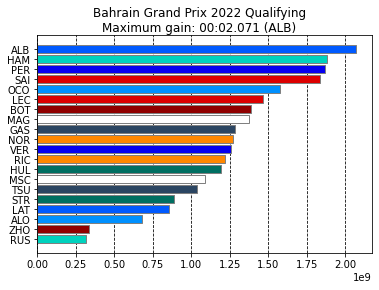

In [110]:
   
fig, ax = plt.subplots()
ax.barh(delta.index, delta['delta_Q_FP'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(delta.index)
ax.set_yticklabels(delta['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Maximum gain: {delta_time_string} ({driver_name})")

plt.show()